In [10]:
import kagglehub
import os
import shutil
import numpy as np
import math
import random
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from platform import python_version
from distutils.dir_util import copy_tree
import tensorflow as tf
from keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Download datasets from Kaggle
print("Downloading datasets...")
viswatejag_animal_detection_small_dataset_path = kagglehub.dataset_download('viswatejag/animal-detection-small-dataset')
kdnishanth_animal_classification_path = kagglehub.dataset_download('kdnishanth/animal-classification')
african_wildlife_path = kagglehub.dataset_download('biancaferreira/african-wildlife')
cheetahtigerwolf_path = kagglehub.dataset_download('jerrinbright/cheetahtigerwolf')
print("Datasets downloaded.")

# Print Python, TensorFlow, and Keras versions
print('Python version:', python_version())
print('Numpy version:', np.__version__)
print('Seaborn version:', sns.__version__)
print('TensorFlow version:', tf.__version__)

# Set up directories
training_data_path = './training_data/'
testing_data_path = './testing_data/'

# If the train_data_path directory already exists, clean it first
if os.path.exists(train_data_path):
    print("Directory already exists. Cleaning it...")
    shutil.rmtree(train_data_path)  # Remove the existing directory

# Create training and testing directories
os.mkdir(training_data_path)
os.mkdir(testing_data_path)

# Copy African Wildlife dataset to training data directory
print("Copying data...")
shutil.copytree(african_wildlife_path, train_data_path)
print("Data copy complete.")

# Ensure paths are correctly set up
print("Train data path:", training_data_path)
print("Test data path:", testing_data_path)

# Data processing setup (example ImageDataGenerator usage)
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_data_path,
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_data_path,
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary'
)

print("Data generators set up.")


Datasets downloaded.
Python version: 3.10.12
Numpy version: 1.26.4
Seaborn version: 0.13.2
TensorFlow version: 2.17.1
Copying data...
Data copy complete.
Train data path: ./training_data/
Test data path: ./testing_data/
Found 1504 images belonging to 4 classes.
Found 0 images belonging to 0 classes.
Data generators set up.


In [4]:
pip install keras_preprocessing


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 1.9 MB/s eta 0:00:00


In [11]:
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import Dropout
from keras_preprocessing.image import ImageDataGenerator

In [13]:
# Create test_data by taking 25% images from data

import shutil
import os
import random
import math

total_train_images, total_test_images, total_train_classes, total_test_classes = 0, 0, 0, 0
path = "./train_data/"

for class_name in os.listdir(path):
    class_path = os.path.join(path, class_name)
    total_train_classes += 1
    total_images = len(os.listdir(class_path))
    test_image_count = math.ceil((25 / 100) * total_images)  # 25% for test, 75% for train

    # Create class directory in the testing data if it doesn't exist
    if not os.path.exists(os.path.join('./test_data', class_name)):
        os.makedirs(os.path.join('./test_data', class_name))

    # Move 25% of images to the testing directory
    moved_count = 0
    while moved_count < test_image_count:
        img = random.choice(os.listdir(class_path))
        img_path = os.path.join(class_path, img)

        # Ensure that it's an image file
        if os.path.isfile(img_path):
            shutil.move(img_path, os.path.join('./test_data', class_name, img))
            moved_count += 1

    print(class_name, total_images, moved_count)
    total_train_images += (total_images - moved_count)

print("Total train images:", total_train_images, "Total train classes:", total_train_classes)


rhino 752 188
buffalo 752 188
elephant 752 188
zebra 752 188
Total train images: 2256 Total train classes: 4


## Task 3: Model Creation

In [14]:
model = Sequential()

In [15]:
#inputlayer : apply filters
model.add(Convolution2D(filters=32,
                        kernel_size=(3,3),
                        strides=(1,1),
                        padding='same',
                        activation='relu',
                   input_shape=(32, 32, 1)))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
# pooling layer where we are doing maxpooling
model.add(MaxPooling2D(pool_size=(2, 2)))

In [17]:
#adding one more convolution layer for better model
model.add(Convolution2D(filters=32,
                        kernel_size=(3,3),
                        strides=(1,1),
                        padding='same',
                        activation='relu'
                      ))

In [18]:
#adding one more Pooling layer for better model
model.add(MaxPooling2D(pool_size=(2, 2)))

In [19]:
#dropout regularlization
model.add(Dropout(0.5))

In [20]:
#layer in which we are converting 2d/3d image to 1d image i.e flattening
model.add(Flatten())

In [21]:
# layer: appling relu to give positive output from here our hidden layerrs starts
model.add(Dense(units=20, activation='relu'))

In [22]:
#dropout regularlization
model.add(Dropout(0.5))

In [23]:
# output layer : Since we have to do multi-class classification so we'll apply softmax activation function
# we have 4 classes of animals so output layer would have that many neurons.
model.add(Dense(units=4, activation='softmax'))

In [24]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [25]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 16, 16, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 8, 8, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 20)                  │          40,980 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 20)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │              84 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,632 (197.78 KB)

 Trainable params: 50,632 (197.78 KB)

 Non-trainable params: 0 (0.00 B)

## Task 4: Image Augmentation

In [26]:
# URL: https://keras.io/api/preprocessing/image/
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory(
    './train_data/',
    target_size=(32, 32),
    color_mode="grayscale",
    batch_size=64,
    class_mode='categorical'
)

test_set = test_datagen.flow_from_directory(
    './test_data/',
    target_size=(32, 32),
    color_mode="grayscale",
    batch_size=64,
    class_mode='categorical'
)


Found 1121 images belonging to 4 classes.
Found 383 images belonging to 4 classes.


In [27]:
training_set.class_indices # to see classes of our dataset

{'buffalo': 0, 'elephant': 1, 'rhino': 2, 'zebra': 3}

## Task 5: Model Training

In [31]:
history = model.fit(
    training_set,
    steps_per_epoch=int(1125 / 64),
    epochs=30,
    validation_data=test_set,
    validation_steps=int(376 / 64)
)


Epoch 1/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 21s 895ms/step - accuracy: 0.3592 - loss: 1.3283 - val_accuracy: 0.3969 - val_loss: 1.3083
Epoch 2/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.3125 - loss: 1.2976 - val_accuracy: 0.4444 - val_loss: 1.2778
Epoch 3/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 21s 792ms/step - accuracy: 0.3861 - loss: 1.3117 - val_accuracy: 0.4469 - val_loss: 1.2319
Epoch 4/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.4219 - loss: 1.2813 - val_accuracy: 0.3492 - val_loss: 1.2500
Epoch 5/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 40s 872ms/step - accuracy: 0.3671 - loss: 1.2879 - val_accuracy: 0.4250 - val_loss: 1.2354
Epoch 6/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.4688 - loss: 1.2401 - val_accuracy: 0.3810 - val_loss: 1.2387
Epoch 7/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 20s 881ms/step - accuracy: 0.4107 - loss: 1.2474 - val_accuracy: 0.3844 - val_loss: 1.2480
Epoch 8/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.3750 - loss: 1.1333 - val_accuracy: 0.

## Task 6: Accuracy

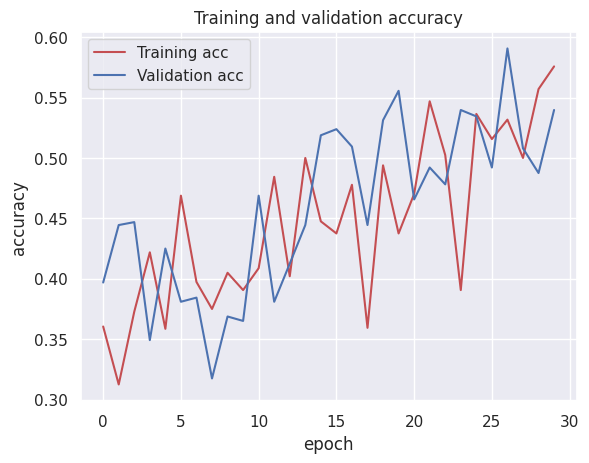

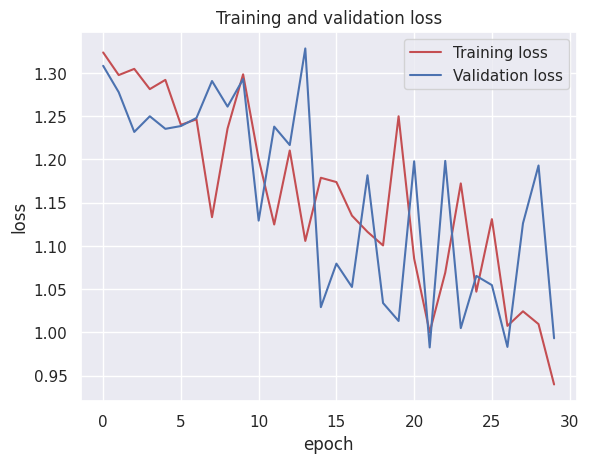

In [32]:
#Graphing our training and validation
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'r', label='Training acc')
plt.plot(epochs, val_accuracy, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

In [40]:
model.save("simple_animal_classification_model.h5")#save model

In [41]:
from keras.models import load_model
model=load_model("simple_animal_classification_model.h5")

In [47]:
from keras.preprocessing import image
import os

# Adjust the path according to your dataset directory structure
image_path = "/content/test_data/elephant/003.txt"  # Ensure the path correctly points to the image file

# Function to get the name of the animal from the directory
def get_animal_name(path):
    if os.path.isfile(path):
        class_name = os.path.basename(os.path.dirname(path))
        return class_name
    return None

# Get the animal name
animal_name = get_animal_name(image_path)

# Print the name of the animal
if animal_name:
    print(f"The animal in the image is: {animal_name}")
else:
    print("The file does not exist or is not an image.")


The animal in the image is: elephant
